In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [70]:


# dataset_path = '/kaggle/input/dry-beans-classification-iti-ai-pro-intake0/'
# df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
data =pd.read_csv('/content/sample_data/train.csv')
classes=(data.groupby('y').count()).index.tolist()

In [71]:
classes

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [72]:
data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(["y"] , axis=1), data['y'] , test_size=0.20, random_state=42 , shuffle = True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8667, 17) (8667,)
Test set: (2167, 17) (2167,)


no null values 

# Check the data is balanced or not ? 


**[recommend this article to understand data balance ](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)**

In [75]:
data['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


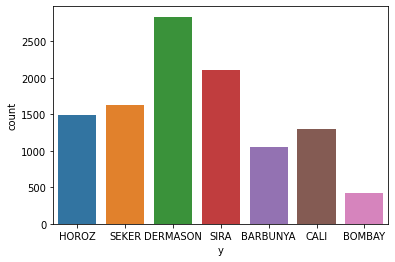

In [76]:
g = sns.countplot(data['y'])
plt.show()

## we can see that there is a  difference between the  classes in the data set data set.

In [77]:
# import library
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_data=X_train
y_data=y_train
X_resampled, y_resampled = ros.fit_resample(X_data, y_data)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[('BARBUNYA', 2282), ('BOMBAY', 2282), ('CALI', 2282), ('DERMASON', 2282), ('HOROZ', 2282), ('SEKER', 2282), ('SIRA', 2282)]


In [78]:
X_resampled.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,6874,69741,1033.122,385.554743,231.672639,1.664222,0.799338,70820,297.988253,0.768242,0.984764,0.821098,0.772882,0.005528,0.001217,0.597346,0.994117
1,401,53419,877.594,343.427162,198.683133,1.728517,0.815661,53925,260.797207,0.684297,0.990617,0.871602,0.759396,0.006429,0.001319,0.576682,0.996805
2,2826,58469,951.946,358.076338,209.119828,1.712302,0.811747,59369,272.846189,0.705840,0.984841,0.810795,0.761978,0.006124,0.001273,0.580610,0.994180
3,1631,45413,851.184,356.481056,162.738886,2.190509,0.889716,46013,240.461281,0.686734,0.986960,0.787668,0.674542,0.007850,0.001002,0.455006,0.996696
4,2245,36890,734.011,279.727236,168.157220,1.663486,0.799138,37371,216.725187,0.787339,0.987129,0.860426,0.774773,0.007583,0.001685,0.600274,0.998547


In [79]:
y_resampled=pd.DataFrame(y_resampled)
y_resampled.head()

,y
0,BARBUNYA
1,SIRA
2,BARBUNYA
3,HOROZ
4,DERMASON


In [80]:
data_balanced = pd.concat([X_resampled , y_resampled] , axis=1)
data_balanced.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,6874,69741,1033.122,385.554743,231.672639,1.664222,0.799338,70820,297.988253,0.768242,0.984764,0.821098,0.772882,0.005528,0.001217,0.597346,0.994117,BARBUNYA
1,401,53419,877.594,343.427162,198.683133,1.728517,0.815661,53925,260.797207,0.684297,0.990617,0.871602,0.759396,0.006429,0.001319,0.576682,0.996805,SIRA
2,2826,58469,951.946,358.076338,209.119828,1.712302,0.811747,59369,272.846189,0.705840,0.984841,0.810795,0.761978,0.006124,0.001273,0.580610,0.994180,BARBUNYA
3,1631,45413,851.184,356.481056,162.738886,2.190509,0.889716,46013,240.461281,0.686734,0.986960,0.787668,0.674542,0.007850,0.001002,0.455006,0.996696,HOROZ
4,2245,36890,734.011,279.727236,168.157220,1.663486,0.799138,37371,216.725187,0.787339,0.987129,0.860426,0.774773,0.007583,0.001685,0.600274,0.998547,DERMASON


### Now My data is balanced 



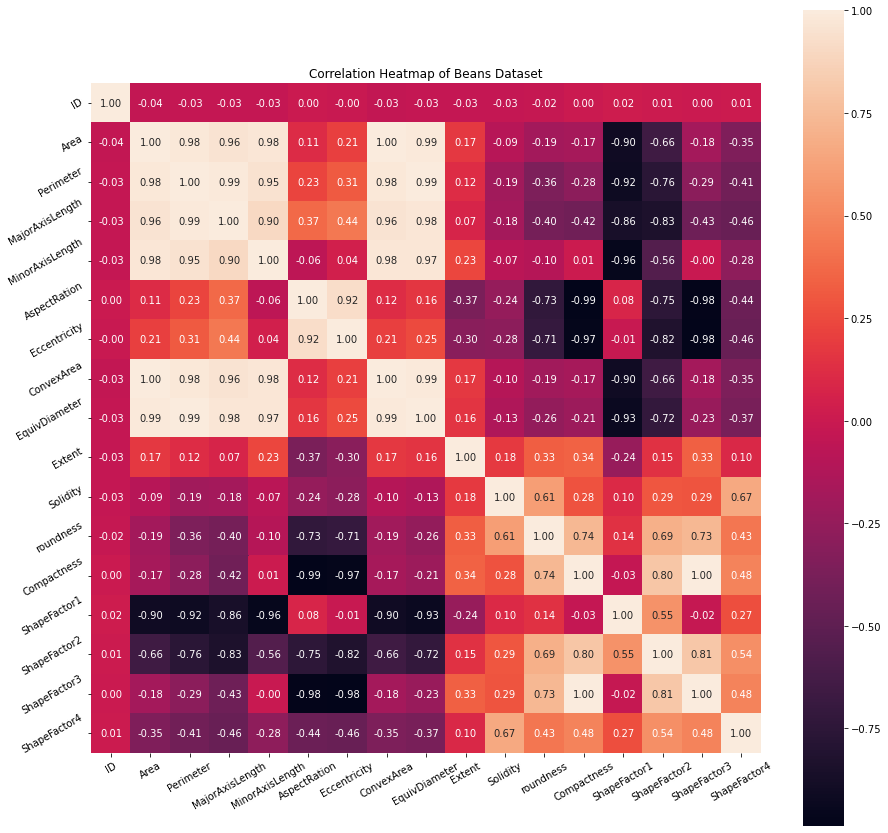

In [81]:
corr_matrix = data_balanced.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [82]:
sorted_mat = corr_matrix.unstack().sort_values()
print(sorted_mat)

Compactness      AspectRation      -0.987258
AspectRation     Compactness       -0.987258
ShapeFactor3     Eccentricity      -0.981421
Eccentricity     ShapeFactor3      -0.981421
AspectRation     ShapeFactor3      -0.978029
                                      ...   
MajorAxisLength  MajorAxisLength    1.000000
Perimeter        Perimeter          1.000000
Area             Area               1.000000
ShapeFactor3     ShapeFactor3       1.000000
ShapeFactor4     ShapeFactor4       1.000000
Length: 289, dtype: float64


In [83]:
# Create correlation matrix

corr_matrix = data_balanced.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [84]:
data_balanced = data_balanced.drop(data_balanced[to_drop], axis=1)

In [85]:
data_balanced=data_balanced.drop(["ID"] , axis=1)

In [87]:
data_balanced.columns

Index(['Area', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity',
       'roundness', 'ShapeFactor2', 'ShapeFactor4', 'y'],
      dtype='object')

In [88]:
data_balanced.head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4,y
0,69741,1.664222,0.799338,0.768242,0.984764,0.821098,0.001217,0.994117,BARBUNYA
1,53419,1.728517,0.815661,0.684297,0.990617,0.871602,0.001319,0.996805,SIRA
2,58469,1.712302,0.811747,0.705840,0.984841,0.810795,0.001273,0.994180,BARBUNYA
3,45413,2.190509,0.889716,0.686734,0.986960,0.787668,0.001002,0.996696,HOROZ
4,36890,1.663486,0.799138,0.787339,0.987129,0.860426,0.001685,0.998547,DERMASON


In [89]:
X_data = data_balanced.drop("y" , axis=1)
y_data =pd.DataFrame(data_balanced['y'])

# Start To Normalize data 

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_data)
X = pd.DataFrame(X , columns= X_data.columns)

In [91]:
X.head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,0.213350,0.468733,0.842097,0.702486,0.868578,0.665219,0.210481,0.892102
1,0.142682,0.515870,0.865780,0.425538,0.946164,0.766572,0.243379,0.943751
2,0.164547,0.503982,0.860102,0.496612,0.869591,0.644542,0.228757,0.893310
3,0.108019,0.854572,0.973228,0.433575,0.897691,0.598131,0.141350,0.941647
4,0.071118,0.468194,0.841807,0.765492,0.899930,0.744143,0.361596,0.977221


In [92]:
X.columns

Index(['Area', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity',
       'roundness', 'ShapeFactor2', 'ShapeFactor4'],
      dtype='object')

In [93]:
# !pip install fast_ml --upgrade

# from fast_ml.model_development import train_valid_test_split


# processing on test

In [94]:
data_4test= pd.concat([X_test , y_test] , axis=1)
data_4test.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
1766,1766,31890,660.655,250.417300,162.522502,1.540816,0.760783,32240,201.503372,0.801962,0.989144,0.918153,0.804670,0.007853,0.002031,0.647494,0.997670,DERMASON
6590,6590,67194,1005.436,394.587499,218.724461,1.804039,0.832309,67865,292.496253,0.647634,0.990113,0.835279,0.741271,0.005872,0.001094,0.549483,0.991288,CALI
4184,4184,33589,687.288,268.520007,159.593116,1.682529,0.804211,33894,206.801458,0.707479,0.991001,0.893572,0.770153,0.007994,0.001735,0.593135,0.997967,DERMASON
2109,2109,42703,778.007,289.102995,189.317134,1.527083,0.755765,43263,233.176217,0.766606,0.987056,0.886546,0.806551,0.006770,0.001767,0.650524,0.993404,SIRA
3181,3181,60409,946.447,359.752385,215.049972,1.672878,0.801666,61368,277.335767,0.731415,0.984373,0.847459,0.770907,0.005955,0.001297,0.594298,0.994188,BARBUNYA


In [95]:
# Create correlation matrix
data_4test= data_4test[['Area', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity',
       'roundness', 'ShapeFactor2', 'ShapeFactor4', 'y']]

In [100]:
data_4test.sample()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4,y
4730,24417,1.805745,0.832658,0.755523,0.987024,0.832846,0.001826,0.996636,DERMASON


In [102]:
y_testing_data = data_4test['y']
y_testing_data=pd.DataFrame(y_testing_data)

testing_data= scaler.fit_transform(data_4test.drop("y" , axis=1))
testing_data = pd.DataFrame(X , columns= data_4test.columns.difference("y"))

TypeError: ignored

In [99]:
testing_data

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4,y
0,0.213350,0.468733,0.842097,0.702486,0.868578,0.665219,0.210481,0.892102,NaN
1,0.142682,0.515870,0.865780,0.425538,0.946164,0.766572,0.243379,0.943751,NaN
2,0.164547,0.503982,0.860102,0.496612,0.869591,0.644542,0.228757,0.893310,NaN
3,0.108019,0.854572,0.973228,0.433575,0.897691,0.598131,0.141350,0.941647,NaN
4,0.071118,0.468194,0.841807,0.765492,0.899930,0.744143,0.361596,0.977221,NaN
...,...,...,...,...,...,...,...,...,...
15969,0.103599,0.335565,0.753500,0.718548,0.860420,0.755700,0.406102,0.958870,NaN
15970,0.120735,0.494647,0.855508,0.703288,0.910739,0.759535,0.273959,0.870458,NaN
15971,0.089952,0.413482,0.809825,0.491157,0.892015,0.760928,0.368342,0.967255,NaN
15972,0.101456,0.453367,0.833654,0.742294,0.916832,0.791092,0.325110,0.965981,NaN


###  Training different models on our dataset

We'll train six models:
- Logistic regression (perceptron)
- Decision tree
- Support vector machine (SVM)
- RandomForestClassifier
- GradientBoostingClassifier
-  AdaBoostClassifier

In [ ]:
from scipy.sparse.construct import random
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier  # Accuracy =  0.9307798800184587
from sklearn.ensemble import RandomForestClassifier #Accuracy =  0.9312413474850023
from sklearn.ensemble import HistGradientBoostingClassifier #Accuracy =  0.930318412551915

from sklearn.ensemble import GradientBoostingClassifier #Accuracy =  0.9293954776188279
from sklearn.ensemble import BaggingClassifier#Accuracy =  0.9164743885556068


from sklearn.neighbors import KNeighborsClassifier #bad
from sklearn.ensemble import ExtraTreesClassifier #Accuracy =  0.9307798800184587
from sklearn.ensemble import AdaBoostClassifier

from sklearn import svm


# ExtraTreesClassifier 

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
ex_model =ExtraTreesClassifier(random_state=42).fit(X_train, y_train)
pred = ex_model.predict(X_test)

print("ExtraTreesClassifier Train set Accuracy: ", accuracy_score(y_train, ex_model.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, pred))

print("classification_report metric :")
print(classification_report(y_test,pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesClassifier Train set Accuracy:  1.0
Test set Accuracy:  0.9671030547163477
classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.99      0.99      0.99       869
      BOMBAY       1.00      1.00      1.00       878
        CALI       0.98      0.99      0.98       854
    DERMASON       0.94      0.91      0.93       848
       HOROZ       0.98      0.98      0.98       833
       SEKER       0.97      0.98      0.97       837
        SIRA       0.90      0.92      0.91       839

    accuracy                           0.97      5958
   macro avg       0.97      0.97      0.97      5958
weighted avg       0.97      0.97      0.97      5958



# LogisticRegression

In [ ]:

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
pred1 = lr_model.predict(X_test)

print("LogisticRegression Train set Accuracy: ", accuracy_score(y_train, lr_model.predict(X_train)))
print("LogisticRegression Test set Accuracy: ", accuracy_score(y_test, pred1))

print("classification_report metric :")
print(classification_report(y_test,pred1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression Train set Accuracy:  0.9213725631249551
LogisticRegression Test set Accuracy:  0.9269889224572004
classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.90      0.93       869
      BOMBAY       1.00      1.00      1.00       878
        CALI       0.92      0.95      0.94       854
    DERMASON       0.92      0.85      0.88       848
       HOROZ       0.95      0.95      0.95       833
       SEKER       0.94      0.95      0.94       837
        SIRA       0.81      0.88      0.84       839

    accuracy                           0.93      5958
   macro avg       0.93      0.93      0.93      5958
weighted avg       0.93      0.93      0.93      5958



# DecisionTreeClassifier

In [ ]:

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

pred2 = dt_model.predict(X_test)

print("\n DecisionTreeClassifier Train set Accuracy: ", accuracy_score(y_train, dt_model.predict(X_train)))
print("\n DecisionTreeClassifier Test set Accuracy: ", accuracy_score(y_test, pred2))

print("\nclassification_report metric :")
print(classification_report(y_test,pred2))


 DecisionTreeClassifier Train set Accuracy:  1.0

 DecisionTreeClassifier Test set Accuracy:  0.9535078885532058

classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.99      0.98       869
      BOMBAY       1.00      1.00      1.00       878
        CALI       0.97      0.97      0.97       854
    DERMASON       0.91      0.89      0.90       848
       HOROZ       0.96      0.98      0.97       833
       SEKER       0.96      0.96      0.96       837
        SIRA       0.90      0.88      0.89       839

    accuracy                           0.95      5958
   macro avg       0.95      0.95      0.95      5958
weighted avg       0.95      0.95      0.95      5958



# SVC

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
pred3 = svm_model.predict(X_test)

print("\n SVC Train set Accuracy: ", accuracy_score(y_train, svm_model.predict(X_train)))
print("\n SVC Test set Accuracy: ", accuracy_score(y_test, pred3))

print("\nclassification_report metric :")
print(classification_report(y_test,pred3)) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 SVC Train set Accuracy:  0.9341773973095461

 SVC Test set Accuracy:  0.9340382678751259

classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.91      0.94       869
      BOMBAY       1.00      1.00      1.00       878
        CALI       0.93      0.96      0.94       854
    DERMASON       0.92      0.86      0.89       848
       HOROZ       0.97      0.95      0.96       833
       SEKER       0.95      0.95      0.95       837
        SIRA       0.82      0.89      0.85       839

    accuracy                           0.93      5958
   macro avg       0.94      0.93      0.93      5958
weighted avg       0.94      0.93      0.93      5958



# RandomForestClassifier

In [ ]:


from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

pred4 = rf_model.predict(X_test)

print("\n RandomForestClassifier Train set Accuracy: ", accuracy_score(y_train, rf_model.predict(X_train)))
print("\n RandomForestClassifier Test set Accuracy: ", accuracy_score(y_test, pred4))

print("\nclassification_report metric :")
print(classification_report(y_test,pred4)) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """



 RandomForestClassifier Train set Accuracy:  1.0

 RandomForestClassifier Test set Accuracy:  0.9669352131587781

classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.99      0.99      0.99       869
      BOMBAY       1.00      1.00      1.00       878
        CALI       0.98      0.99      0.99       854
    DERMASON       0.94      0.91      0.93       848
       HOROZ       0.98      0.98      0.98       833
       SEKER       0.97      0.98      0.97       837
        SIRA       0.91      0.92      0.91       839

    accuracy                           0.97      5958
   macro avg       0.97      0.97      0.97      5958
weighted avg       0.97      0.97      0.97      5958



# GradientBoostingClassifier

In [ ]:


from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators= 60, learning_rate=.19, max_depth=5)
gb_model.fit(X_train, y_train)


pred5 = gb_model.predict(X_test)

print("\n GradientBoostingClassifier Train set Accuracy: ", accuracy_score(y_train, gb_model.predict(X_train)))
print("\n GradientBoostingClassifier Test set Accuracy: ", accuracy_score(y_test, pred5))

print("\nclassification_report metric :")
print(classification_report(y_test,pred5)) 
#  0.9644175897952333


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 GradientBoostingClassifier Train set Accuracy:  0.9984893173153011

 GradientBoostingClassifier Test set Accuracy:  0.9644175897952333

classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.99      0.99       869
      BOMBAY       1.00      1.00      1.00       878
        CALI       0.99      0.98      0.98       854
    DERMASON       0.94      0.90      0.92       848
       HOROZ       0.98      0.98      0.98       833
       SEKER       0.97      0.98      0.97       837
        SIRA       0.89      0.92      0.91       839

    accuracy                           0.96      5958
   macro avg       0.96      0.96      0.96      5958
weighted avg       0.96      0.96      0.96      5958



# AdaBoostClassifier

In [ ]:


from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)


pred6 = ab_model.predict(X_test)

print("\n AdaBoostClassifier Train set Accuracy: ", accuracy_score(y_train, ab_model.predict(X_train)))
print("\n AdaBoostClassifier Test set Accuracy: ", accuracy_score(y_test, pred6))

print("\nclassification_report metric :")
print(classification_report(y_test,pred6)) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 AdaBoostClassifier Train set Accuracy:  0.6749874109776275

 AdaBoostClassifier Test set Accuracy:  0.6738838536421617

classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       1.00      0.04      0.07       869
      BOMBAY       1.00      1.00      1.00       878
        CALI       0.52      0.92      0.66       854
    DERMASON       0.00      0.00      0.00       848
       HOROZ       0.92      0.90      0.91       833
       SEKER       0.94      0.88      0.91       837
        SIRA       0.43      0.99      0.60       839

    accuracy                           0.67      5958
   macro avg       0.69      0.68      0.59      5958
weighted avg       0.69      0.67      0.59      5958



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LGBMClassifier

In [ ]:
LGBM = LGBMClassifier(learning_rate=0.19,max_depth=5,n_estimators=60,reg_lambda=0.25,num_leaves = 46,class_weight ='balanced').fit(X_train,y_train)
pred7 = LGBM.predict(X_test)

print("\n LGBMClassifier Train set Accuracy: ", accuracy_score(y_train, LGBM.predict(X_train)))
print("\n LGBMClassifier Test set Accuracy: ", accuracy_score(y_test, pred7))

print("\nclassification_report metric :")
print(classification_report(y_test,pred7)) 
# 60, 6 # 0.9627391742195368



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 LGBMClassifier Train set Accuracy:  0.9774836342709158

 LGBMClassifier Test set Accuracy:  0.9605572339711312

classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.99      0.98       869
      BOMBAY       1.00      1.00      1.00       878
        CALI       0.99      0.98      0.98       854
    DERMASON       0.93      0.91      0.92       848
       HOROZ       0.98      0.97      0.97       833
       SEKER       0.96      0.97      0.97       837
        SIRA       0.89      0.91      0.90       839

    accuracy                           0.96      5958
   macro avg       0.96      0.96      0.96      5958
weighted avg       0.96      0.96      0.96      5958



In [ ]:
# import os 
# dataset_path = '../input/dry-beans-classification-iti-ai-pro-intake02/'
# test_data = pd.read_csv(os.path.join(dataset_path, 'test.csv'))

# _test.shape


In [ ]:
test_data = pd.read_csv("/content/sample_data/test.csv")
# test_data.info()
_test = test_data[['ID', 'Area', 'AspectRation', 'Eccentricity', 'Extent', 'Solidity',
       'roundness', 'ShapeFactor2', 'ShapeFactor4']]
scaler = MinMaxScaler()
test_ = scaler.fit_transform(_test)
test_ = pd.DataFrame(test_ , columns= _test.columns)

test_.head()



,ID,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,0.000000,0.176284,0.671244,0.923647,0.174218,0.283799,0.532371,0.137476,0.259451
1,0.000369,0.039066,0.290223,0.704878,0.720788,0.870792,0.816468,0.625947,0.964772
2,0.000739,0.162119,0.235157,0.643529,0.666956,0.694580,0.615819,0.445200,0.917530
3,0.001108,0.020326,0.296222,0.710795,0.530918,0.880329,0.872610,0.683242,0.977656
4,0.001477,0.576207,0.342004,0.751899,0.859266,0.859997,0.714562,0.134543,0.841017


In [ ]:
y_test_predicted = gb_model.predict(test_)
len(y_test_predicted)


2709

In [ ]:
# test_data.head(5)
# _test.head()

In [ ]:
y_test_predicted = LGBM.predict(test_)


test_data['y'] = y_test_predicted

test_data['y'] = test_data['y'].astype('object') 

test_data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY


In [ ]:
test_data[['ID','y']].to_csv('finalres5.csv', index=False)

In [ ]:
sub =pd.read_csv("/content/finalres5.csv")

In [ ]:
sub[0:50]

,ID,y
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
5,10839,SIRA
6,10840,DERMASON
7,10841,SEKER
8,10842,SIRA
9,10843,SIRA
